(300, 4096)
(100, 4096)
Puntuación train: 1.0
Puntuación test: 0.98
Accuracy: 0.980000
Precision: 0.965812
Accuracy datos entrenamiento: 1.000000
Precision datos evaluacion: 0.965812


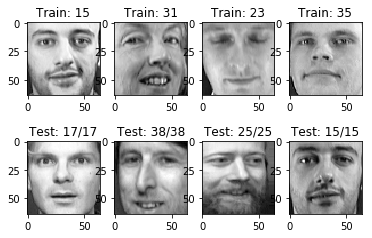

In [3]:
%matplotlib inline

from sklearn import datasets, metrics, linear_model, model_selection
import matplotlib.pyplot as plt

#cargar dataset de caras
faces = datasets.fetch_olivetti_faces()

X = faces.data
Y = faces.target

#separamos entrenamiento y test
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y)

print(x_train.shape)
print(x_test.shape)

# Clasificador Logistic
modelo = linear_model.LogisticRegression(C=10000)

# entrenamiento
modelo.fit(x_train, y_train)

# predecir a partir de los datos de test
expected = y_test
predicted = modelo.predict(x_test)


# puntuación basada en el modelo de predicción: 1 corresponde a predicción perfecta
print('Puntuación train:',modelo.score(x_train, y_train))

# puntuación basada en el modelo de predicción: 1 corresponde a predicción perfecta
print('Puntuación test:',modelo.score(x_test, y_test))

print("Accuracy: %2f" % metrics.accuracy_score(y_test, predicted))
print("Precision: %2f" % metrics.precision_score(y_test, predicted, average="macro"))

# Realizando las predicciones
y_predic_entrenamiento = modelo.predict(x_train) 
y_predic_evaluacion = modelo.predict(x_test)

print("Accuracy datos entrenamiento: %2f" % metrics.accuracy_score(y_train, y_predic_entrenamiento))
print("Precision datos evaluacion: %2f" % metrics.precision_score(y_test, y_predic_evaluacion, average="macro"))

# Convertir datos en imágenes
x_train_images = x_train.reshape(len(x_train), 64, 64)
x_test_images = x_test.reshape(len(x_test), 64, 64)

# imágenes de entrenamiento
for index, (image, label) in enumerate(
    list(zip(x_train_images, y_train))[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('on')
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('Train: %i' % label)

# imagenes de test   
for index, (image, prediction, expectation) in enumerate(
    list(zip(x_test_images, predicted, expected))[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('on')
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('Test: %i/%i' % (prediction, expectation))